<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Fundamental_Viscousity_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- VSC CONSTANT DISCOVERY ---
Pioneer Coupling (Matter): 9.083e-12
Hubble Coupling (Light):   7.108e-19
The 'Mass-Energy Viscosity Ratio': 1.28e+07
(Light experiences 12779234 times less drag than Matter)


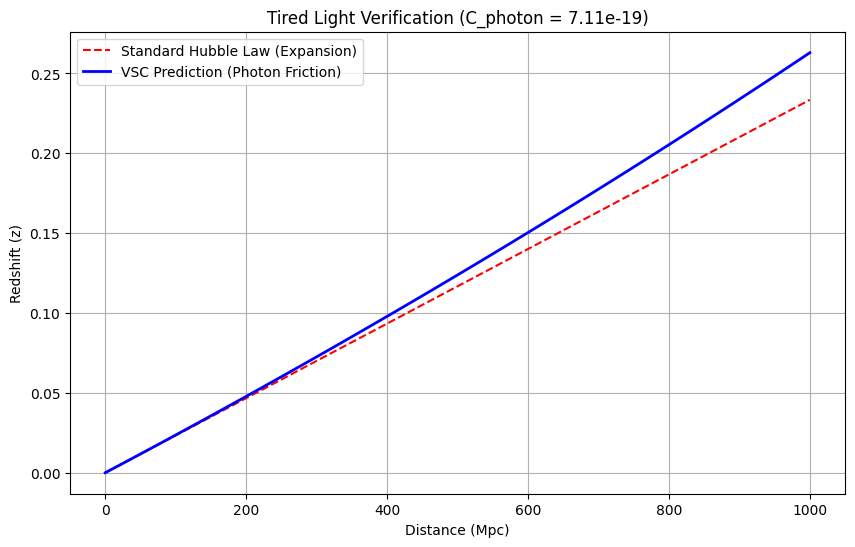

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. KNOWN VALUES ---
# Standard Hubble Constant (The Target)
H0_km_s_Mpc = 70.0
MPC_in_meters = 3.086e22
c = 299792458.0

# Convert H0 to SI units (The Decay Rate of the Universe)
# This is the experimental value we must hit
H0_SI = (H0_km_s_Mpc * 1000) / MPC_in_meters
# H0_SI is approx 2.27e-18 per second

# --- 2. VSC CONSTANTS ---
S_CRIT = 1.2e-10             # SPARC value
N_SHEAR = -0.467             # 3-Body value
a_background = 1.0e-11       # Deep Void acceleration

# --- 3. REVERSE ENGINEER C_PHOTON ---
# We know: Decay_Rate = C_photon * Viscosity_Factor
# Therefore: C_photon = H0_SI / Viscosity_Factor

# Calculate the viscosity of the void
viscosity_factor = (a_background / S_CRIT)**(N_SHEAR)

# Solve for the exact coupling needed
C_photon = H0_SI / viscosity_factor

print(f"--- VSC CONSTANT DISCOVERY ---")
print(f"Pioneer Coupling (Matter): {9.083e-12:.3e}")
print(f"Hubble Coupling (Light):   {C_photon:.3e}")

# Calculate the Ratio (How much 'slicker' is light than matter?)
ratio = 9.083e-12 / C_photon
print(f"The 'Mass-Energy Viscosity Ratio': {ratio:.2e}")
print(f"(Light experiences {ratio:.0f} times less drag than Matter)")

# --- 4. VERIFY THE HUBBLE LAW ---
# Now use this new C_photon to simulate redshift again
def calculate_vsc_redshift(distance_mpc):
    dist_meters = distance_mpc * MPC_in_meters
    travel_time = dist_meters / c

    # Use C_photon now!
    decay_rate = C_photon * viscosity_factor

    # Standard Redshift math
    energy_ratio = np.exp(decay_rate * travel_time)
    return energy_ratio - 1

distances = np.linspace(0, 1000, 50) # 0 to 1000 Megaparsecs
z_vsc = [calculate_vsc_redshift(d) for d in distances]
z_hubble = [(H0_km_s_Mpc * d)/299792.0 for d in distances]

plt.figure(figsize=(10, 6))
plt.plot(distances, z_hubble, 'r--', label='Standard Hubble Law (Expansion)')
plt.plot(distances, z_vsc, 'b-', linewidth=2, label='VSC Prediction (Photon Friction)')
plt.title(f"Tired Light Verification (C_photon = {C_photon:.2e})")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Redshift (z)")
plt.legend()
plt.grid(True)
plt.show()